**Прогнозирование цены криптовалюты**<br>

> **Задача** <br>
Спрогнозировать цену биткоина для таймфреймов одна минута и один день




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Specify a path variable (project path)
proj_path = '/content/gdrive/MyDrive/Colab Notebooks/save_data/'

Mounted at /content/gdrive


Using Binance API from binance.com data was downloaded. Amount of rows is 1204000. Each row has trading info for a minute. Data contains next fields: <br>


Feature | Description
--------|------------
open_time | time of starting trading timeframe <br>
clost_time | time of finishing trading timeframe<br>
open_price | price at open_time <br>
close_price | price at close_time <br>
high_price  | maximum price during timeframe <br>
low_price | minimum price during timeframe <br>
volume | trade volume in dollars <br>
quote_asset_volume | trade volume in bitcoins <br>
trades_number | amount of trades during timeframe <br>
taker_buy_base_asset_volume | buying volume in dollars <br>
taker_buy_quote_asset_volume | buying volume in bitcoins <br>
<br>


In [ ]:
import pandas as pd

# Load the data into a DataFrame
candles = pd.read_csv(proj_path + 'binance_data.csv')
candles

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,trades_number,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1678414380000,20106.82,20118.00,20101.90,20116.59,165.194330,1678414439999,3.322095e+06,4672,81.958640,1.648224e+06
1,1678414440000,20116.18,20127.96,20108.71,20125.44,191.487240,1678414499999,3.852397e+06,5402,104.695990,2.106379e+06
2,1678414500000,20125.44,20125.84,20084.04,20084.81,431.434380,1678414559999,8.672093e+06,9675,182.413620,3.666413e+06
3,1678414560000,20084.81,20094.19,20078.59,20089.34,230.222210,1678414619999,4.624388e+06,6257,123.726580,2.485277e+06
4,1678414620000,20088.85,20089.73,20067.96,20075.98,387.942880,1678414679999,7.789311e+06,7693,190.734990,3.829753e+06
...,...,...,...,...,...,...,...,...,...,...,...
1203995,1606212180000,19069.04,19094.99,19040.99,19048.09,166.041829,1606212239999,3.166864e+06,3210,69.709684,1.329408e+06
1203996,1606212240000,19048.10,19100.00,19045.98,19092.32,224.591430,1606212299999,4.286742e+06,3214,170.770636,3.259867e+06
1203997,1606212300000,19092.32,19099.94,19047.17,19062.58,162.456095,1606212359999,3.099339e+06,2967,80.073361,1.527817e+06
1203998,1606212360000,19066.65,19096.60,19062.58,19069.19,128.091541,1606212419999,2.444322e+06,3051,58.514268,1.116667e+06


In [ ]:
#drop NAN and sort
candles.dropna(inplace=True)
candles.sort_values(by=['open_time'], inplace=True)
candles = candles.reset_index().drop(axis=1, labels='index')
candles

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,trades_number,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,1606152480000,18368.65,18372.84,18360.61,18372.29,26.781509,1606152539999,4.918651e+05,696,6.624685,1.216684e+05
1,1606152540000,18372.29,18424.65,18372.29,18422.27,76.613496,1606152599999,1.409693e+06,1446,33.708170,6.200611e+05
2,1606152600000,18422.46,18431.44,18406.37,18431.14,68.811598,1606152659999,1.267483e+06,1199,37.861960,6.974117e+05
3,1606152660000,18431.22,18461.91,18430.25,18455.73,116.770036,1606152719999,2.153837e+06,2126,77.740112,1.433895e+06
4,1606152720000,18455.73,18461.91,18433.34,18455.78,72.921204,1606152779999,1.345223e+06,1276,35.250109,6.503058e+05
...,...,...,...,...,...,...,...,...,...,...,...
1203995,1678474080000,19924.80,19931.91,19909.00,19911.25,262.092420,1678474139999,5.221013e+06,6421,120.419530,2.398889e+06
1203996,1678474140000,19912.20,19912.96,19886.76,19892.08,272.135010,1678474199999,5.414204e+06,6677,133.420910,2.654445e+06
1203997,1678474200000,19892.61,19904.63,19885.80,19895.61,279.223930,1678474259999,5.555089e+06,6247,136.152470,2.708701e+06
1203998,1678474260000,19896.19,19896.23,19871.03,19871.03,264.105290,1678474319999,5.251615e+06,6622,126.312060,2.511738e+06


In [ ]:
pd.to_datetime(candles['open_time'], unit='ms')

0         2020-11-23 17:28:00
1         2020-11-23 17:29:00
2         2020-11-23 17:30:00
3         2020-11-23 17:31:00
4         2020-11-23 17:32:00
                  ...        
1203995   2023-03-10 18:48:00
1203996   2023-03-10 18:49:00
1203997   2023-03-10 18:50:00
1203998   2023-03-10 18:51:00
1203999   2023-03-10 18:52:00
Name: open_time, Length: 1204000, dtype: datetime64[ns]

# Make data continious

First check if the data is continious or has spaces

In [ ]:
time_df = pd.DataFrame()
time_df['diff_times'] = candles.shift(-1).iloc[:-2, 0] - candles.iloc[:-2, 6]
time_df.dropna(inplace=True)
time_df[time_df.diff_times > 1] / 60000 # find for how many minutes there was a trade stop

,diff_times
9391,60.000017
40039,252.657983
44839,60.000017
114000,79.087117
146940,90.000017
211650,150.000017
218821,284.030900
376816,270.016667
444526,120.000017
568126,0.093967


In [ ]:
#Create time dataframe with trade stop time and recover time
time = pd.DataFrame(candles.iloc[time_df[time_df.diff_times > 1].index, [0]])
time['During of rip'] = time_df.loc[time.index, 'diff_times'] / 60000
#time = time.append(candles.iloc[time_df[time_df.diff_times > 1].index + 1, [0]])
time.sort_index(inplace=True)

#Get the date of space
time["date"] = pd.to_datetime(time["open_time"], unit='ms')
time[['During of rip', 'date']]

,During of rip,date
9391,60.000017,2020-11-30 05:59:00
40039,252.657983,2020-12-21 13:47:00
44839,60.000017,2020-12-25 01:59:00
114000,79.087117,2021-02-11 03:40:00
146940,90.000017,2021-03-06 01:59:00
211650,150.000017,2021-04-20 01:59:00
218821,284.030900,2021-04-25 04:00:00
376816,270.016667,2021-08-13 01:59:00
444526,120.000017,2021-09-29 06:59:00
568126,0.093967,2021-12-24 04:59:00


Data **has** spaces and some of them are long. But only **first half** of the dataset has spaces. Let's keep only ***second half*** of the dataset to avoid errors of the blank space fillers methods. <br>
Cut off a part with uncontinous data

In [ ]:
cont_candles = candles.iloc[time.index.max():, :]
cont_candles

,open_time,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,trades_number,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
568126,1640321940000,50951.62,50951.62,50926.58,50951.41,16.27482,1640321994362,8.291027e+05,1126,6.83894,3.484437e+05
568127,1640322000000,50951.41,50951.47,50920.62,50931.91,7.22049,1640322059999,3.678015e+05,389,2.56967,1.308919e+05
568128,1640322060000,50931.91,50931.97,50876.70,50880.00,25.65137,1640322119999,1.305590e+06,1185,9.06440,4.614009e+05
568129,1640322120000,50876.73,50880.00,50837.71,50837.71,16.19787,1640322179999,8.238050e+05,1201,6.86989,3.493606e+05
568130,1640322180000,50840.81,50919.27,50837.71,50909.47,22.53036,1640322239999,1.146249e+06,1215,13.97411,7.108917e+05
...,...,...,...,...,...,...,...,...,...,...,...
1203995,1678474080000,19924.80,19931.91,19909.00,19911.25,262.09242,1678474139999,5.221013e+06,6421,120.41953,2.398889e+06
1203996,1678474140000,19912.20,19912.96,19886.76,19892.08,272.13501,1678474199999,5.414204e+06,6677,133.42091,2.654445e+06
1203997,1678474200000,19892.61,19904.63,19885.80,19895.61,279.22393,1678474259999,5.555089e+06,6247,136.15247,2.708701e+06
1203998,1678474260000,19896.19,19896.23,19871.03,19871.03,264.10529,1678474319999,5.251615e+06,6622,126.31206,2.511738e+06


# Delete unuseful fields

At first we can remove **close_time** because its value is equal to open_price + 60000 - 1 (where 60000 ms = 1 minute) <br>
Secondly, fields **taker_buy_quote_asset_volume** and **quote_asset_volume** have the same data as *taker_buy_base_asset_volume* and *volume* respectively.

In [ ]:
#Leave only necessary data columns

#WA = "WEIGHTED AVERAGE"
OPR = "OPEN PRICE"
HPR = "HIGH PRICE"
LPR = "LOW PRICE"
CPR = "CLOSE PRICE"
VOL = "VOLUME"
TN = "TRADES NUMBER"
TAKER = "TAKER"
OTIME = "OPEN TIME"

COLUMNS = [OPR, HPR, LPR, CPR, VOL, TN, TAKER, OTIME]

In [ ]:
def reparse_candle(candle):

    return [
        float(candle[1]),
        float(candle[2]),
        float(candle[3]),
        float(candle[4]),
        float(candle[5]),
        float(candle[8]),
        float(candle[9]),
        int(candle[0])
    ]

parsed_klines = pd.DataFrame(
    list(map(reparse_candle, cont_candles.values.tolist())),
    columns=COLUMNS
)

parsed_klines

,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,OPEN TIME
0,50951.62,50951.62,50926.58,50951.41,16.27482,1126.0,6.83894,1640321940000
1,50951.41,50951.47,50920.62,50931.91,7.22049,389.0,2.56967,1640322000000
2,50931.91,50931.97,50876.70,50880.00,25.65137,1185.0,9.06440,1640322060000
3,50876.73,50880.00,50837.71,50837.71,16.19787,1201.0,6.86989,1640322120000
4,50840.81,50919.27,50837.71,50909.47,22.53036,1215.0,13.97411,1640322180000
...,...,...,...,...,...,...,...,...
635869,19924.80,19931.91,19909.00,19911.25,262.09242,6421.0,120.41953,1678474080000
635870,19912.20,19912.96,19886.76,19892.08,272.13501,6677.0,133.42091,1678474140000
635871,19892.61,19904.63,19885.80,19895.61,279.22393,6247.0,136.15247,1678474200000
635872,19896.19,19896.23,19871.03,19871.03,264.10529,6622.0,126.31206,1678474260000


# Analysis

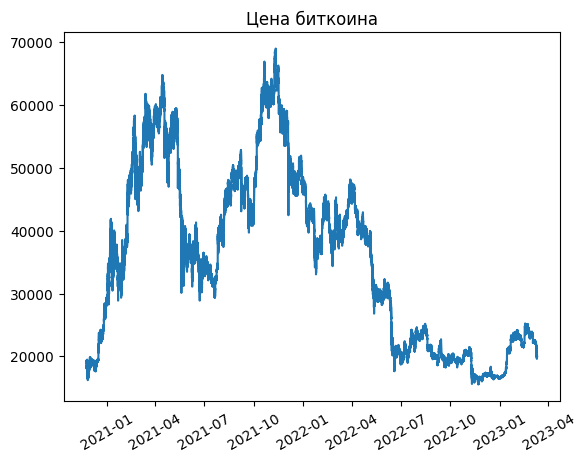

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(pd.to_datetime(candles['open_time'], unit='ms'), candles['open_price'])
plt.title('Цена биткоина')
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.show()

In [ ]:
PRCH = "PRICE CHANGE"
VOL_TN = "VOLUME PER TRADE NUMBER"
parsed_klines[PRCH] = parsed_klines[CPR] - parsed_klines[OPR]
parsed_klines[VOL_TN] = parsed_klines[VOL] / parsed_klines[TN]
parsed_klines

,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,OPEN TIME,PRICE CHANGE,VOLUME PER TRADE NUMBER
0,50951.41,50951.47,50920.62,50931.91,7.22049,389.0,2.56967,1640322000000,-19.50,0.018562
1,50931.91,50931.97,50876.70,50880.00,25.65137,1185.0,9.06440,1640322060000,-51.91,0.021647
2,50876.73,50880.00,50837.71,50837.71,16.19787,1201.0,6.86989,1640322120000,-39.02,0.013487
3,50840.81,50919.27,50837.71,50909.47,22.53036,1215.0,13.97411,1640322180000,68.66,0.018544
4,50909.47,50931.95,50869.08,50880.26,14.09173,788.0,4.37506,1640322240000,-29.21,0.017883
...,...,...,...,...,...,...,...,...,...,...
635868,19924.80,19931.91,19909.00,19911.25,262.09242,6421.0,120.41953,1678474080000,-13.55,0.040818
635869,19912.20,19912.96,19886.76,19892.08,272.13501,6677.0,133.42091,1678474140000,-20.12,0.040757
635870,19892.61,19904.63,19885.80,19895.61,279.22393,6247.0,136.15247,1678474200000,3.00,0.044697
635871,19896.19,19896.23,19871.03,19871.03,264.10529,6622.0,126.31206,1678474260000,-25.16,0.039883


In [ ]:
parsed_klines.describe()

,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,OPEN TIME,PRICE CHANGE,VOLUME PER TRADE NUMBER
count,635873.000000,635873.000000,635873.000000,635873.000000,635873.000000,635873.000000,635873.000000,6.358730e+05,635873.000000,635873.000000
mean,27582.907916,27596.900737,27569.055677,27582.857826,115.175716,2701.739652,57.259896,1.659398e+12,-0.050091,0.039089
std,10036.858824,10041.740105,10031.919115,10036.820351,156.184638,2835.280590,78.649101,1.101365e+10,25.516326,0.017751
min,15513.840000,15544.470000,15476.000000,15513.840000,0.279400,89.000000,0.054270,1.640322e+12,-1094.870000,0.002728
25%,19743.250000,19753.860000,19733.060000,19743.250000,24.379170,668.000000,11.724570,1.649860e+12,-8.250000,0.027100
50%,22964.770000,22975.000000,22954.590000,22964.730000,70.937000,2025.000000,34.829670,1.659398e+12,-0.010000,0.036130
75%,38465.240000,38484.270000,38446.620000,38465.230000,146.875380,3687.000000,72.992820,1.668936e+12,8.140000,0.047526
max,51956.660000,52088.000000,51927.880000,51956.650000,4646.212970,69837.000000,2851.740070,1.678474e+12,914.580000,0.585448


In [ ]:
sorted_klines_vol_tn = parsed_klines[[PRCH, VOL_TN]].sort_values(by=VOL_TN)
sorted_klines_vol_tn

,PRICE CHANGE,VOLUME PER TRADE NUMBER
224062,0.00,0.002728
74454,13.10,0.002911
234702,-0.01,0.003063
162762,0.00,0.003070
162679,0.00,0.003098
...,...,...
237511,26.36,0.375678
241808,-165.13,0.400646
221841,21.84,0.406677
223000,-22.90,0.413835


In [ ]:
import matplotlib.pyplot as plt

def build_plot(df, columns):
  plt.plot(df[columns[0]], df[columns[1]])
  plt.title(f'{columns[1]} dependency from {columns[0]}')
  plt.xlabel(columns[0])
  plt.ylabel(columns[1])
  plt.legend()
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


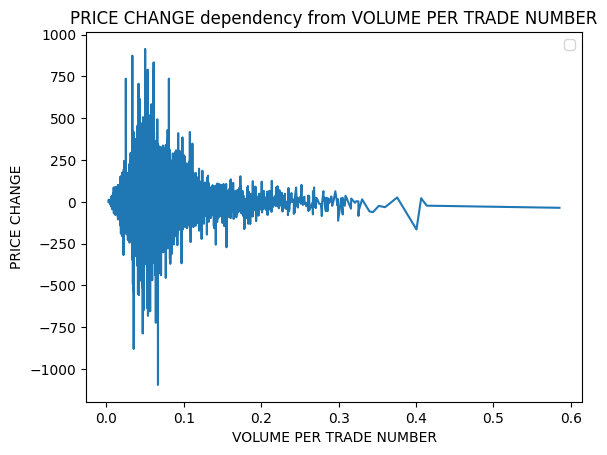

In [ ]:
build_plot(sorted_klines_vol_tn, [VOL_TN, PRCH])

In [ ]:
ABS_PRCH = 'ABS PRICE CHANGE'
sorted_klines_vol_tn[ABS_PRCH] = abs(sorted_klines_vol_tn[PRCH])
sorted_klines_vol_tn

,PRICE CHANGE,VOLUME PER TRADE NUMBER,ABS PRICE CHANGE
224062,0.00,0.002728,0.00
74454,13.10,0.002911,13.10
234702,-0.01,0.003063,0.01
162762,0.00,0.003070,0.00
162679,0.00,0.003098,0.00
...,...,...,...
237511,26.36,0.375678,26.36
241808,-165.13,0.400646,165.13
221841,21.84,0.406677,21.84
223000,-22.90,0.413835,22.90


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


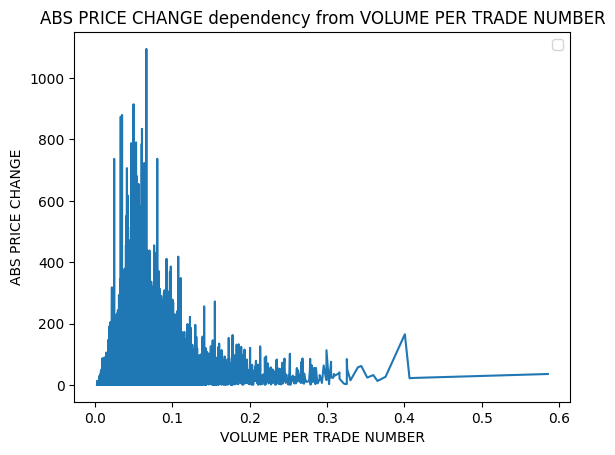

In [ ]:
build_plot(sorted_klines_vol_tn, [VOL_TN, ABS_PRCH])

Из данного графика можно сделать вывод о том, что существует зависимость между безнакового изменения цены и средним объемом за трейд.

Отсюда, если научиться прогнозировать объем, количество трейдов или сразу средний объем за трейд и движение цены, тогда можно будет спрогнозировать и само значение цены.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


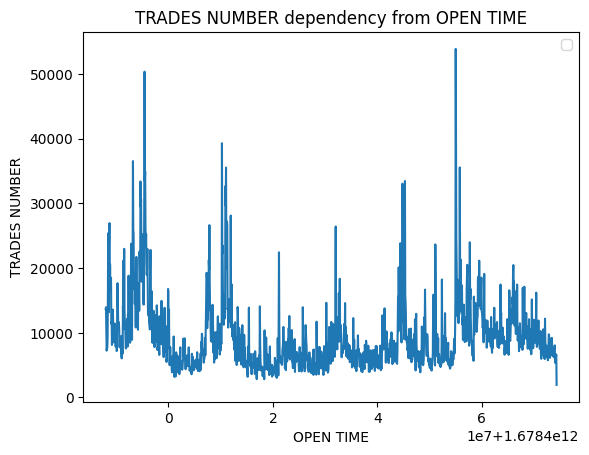

In [ ]:
build_plot(parsed_klines.iloc[-1440:], [OTIME, TN])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


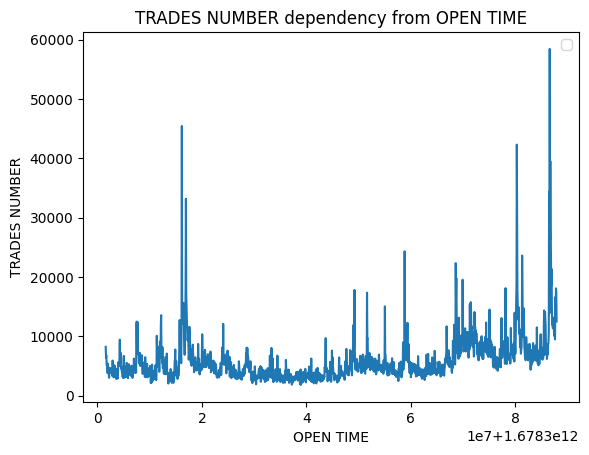

In [ ]:
build_plot(parsed_klines.iloc[-2880:-1440], [OTIME, TN])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


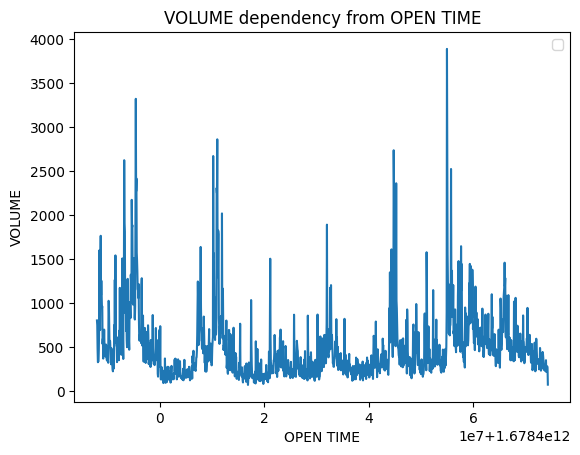

In [ ]:
build_plot(parsed_klines.iloc[-1440:], [OTIME, VOL])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


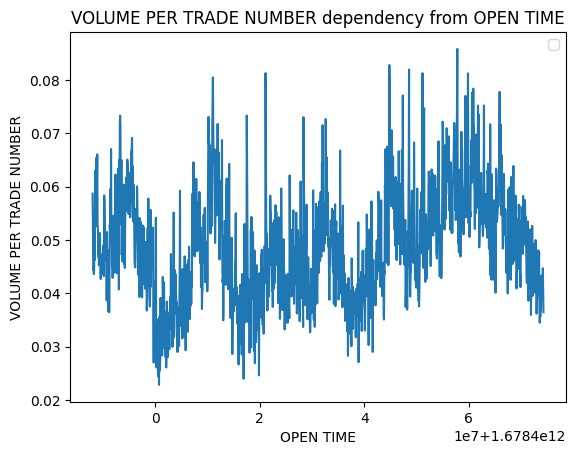

In [ ]:
build_plot(parsed_klines.iloc[-1440:], [OTIME, VOL_TN])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


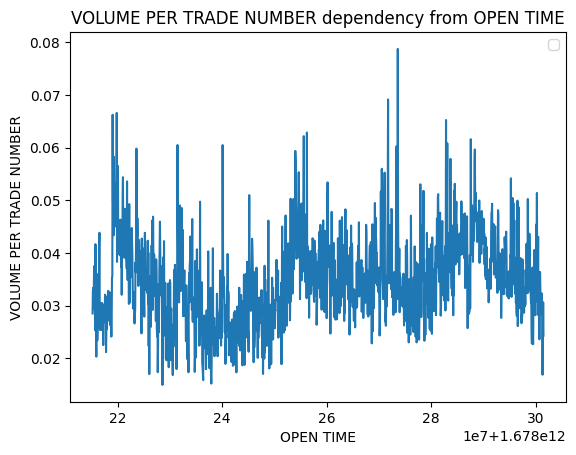

In [ ]:
build_plot(parsed_klines.iloc[-4320:-2880], [OTIME, VOL_TN])

In [ ]:
import numpy as np

def agg_to_freq_data(df, mins: int):
    """
    Aggregate data from data for minute to data for hour
    :param df:
    :param mins: int frequency im minutes
    :return: df with new column day_hour. It contains hour of a day
    """
    df["date"] = pd.to_datetime(df[OTIME], unit='ms')

    # docs about freq https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    df = df.groupby(pd.Grouper(key='date', freq=f'{mins}min')).agg({OTIME: np.min, OPR: 'first',
                                                                    HPR: np.max, LPR: np.min,
                                                                    CPR: 'last', VOL: np.sum,
                                                                    TN: np.sum, TAKER: np.sum})
    df = df.reset_index()
    return df

In [ ]:
hour_klines = agg_to_freq_data(parsed_klines.loc[:, COLUMNS], 60)
hour_klines[PRCH] = hour_klines[CPR] - hour_klines[OPR]
hour_klines

,date,OPEN TIME,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,PRICE CHANGE
0,2021-12-24 05:00:00,1640322000000,50951.41,51026.34,50828.99,51012.73,765.92466,38919.0,376.32741,61.32
1,2021-12-24 06:00:00,1640325600000,51012.72,51012.73,50736.11,50883.73,955.19150,43232.0,477.87504,-128.99
2,2021-12-24 07:00:00,1640329200000,50883.73,51076.98,50818.10,50994.75,913.84277,33824.0,477.85241,111.02
3,2021-12-24 08:00:00,1640332800000,50994.75,51198.00,50895.57,51069.18,998.78873,38315.0,509.86182,74.43
4,2021-12-24 09:00:00,1640336400000,51069.18,51300.01,51034.97,51267.12,909.00254,32787.0,460.28095,197.94
...,...,...,...,...,...,...,...,...,...,...
10593,2023-03-10 14:00:00,1678456800000,20184.90,20191.40,19657.11,19819.80,47271.45090,763464.0,23348.47474,-365.10
10594,2023-03-10 15:00:00,1678460400000,19819.80,20037.75,19766.00,20004.96,36948.61278,610109.0,18777.73823,185.16
10595,2023-03-10 16:00:00,1678464000000,20004.96,20307.73,19928.83,20016.36,36709.18200,651876.0,18733.13791,11.40
10596,2023-03-10 17:00:00,1678467600000,20015.11,20082.66,19830.74,19930.48,31007.14935,597819.0,15401.30976,-84.63


In [ ]:
def build_hour_plot(df, field):
  df_stats = df.loc[:, [OTIME, field]]
  df_stats['date'] = df['date'].dt.date
  df_stats['hour'] = df['date'].dt.hour

  df_stats[f'{field} sum'] = df_stats.groupby(by='date')[field].transform('sum')
  df_stats[f'{field} avg'] = df_stats[field] / df_stats[f'{field} sum']

  heatmap_of_field = df_stats.pivot(index='date', columns='hour', values=f'{field} avg')
  heatmap_of_field.dropna(inplace=True)
  print(heatmap_of_field.describe())

  hour_mean_of_field = heatmap_of_field.describe().loc['mean', :]
  hour_mean_of_field = hour_mean_of_field.reset_index()
  hour_mean_of_field.rename(columns={'mean': f'{field} percentage'}, inplace=True)
  build_plot(hour_mean_of_field, ['hour', f'{field} percentage'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hour           0           1           2           3           4           5   \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.043012    0.037724    0.035459    0.033063    0.031987    0.030973   
std      0.020336    0.018883    0.017646    0.016884    0.016564    0.013559   
min      0.006591    0.011362    0.008084    0.004795    0.007356    0.007999   
25%      0.030112    0.026300    0.024267    0.022444    0.022743    0.022655   
50%      0.038627    0.034222    0.031419    0.029426    0.028938    0.028063   
75%      0.050879    0.044354    0.041408    0.038118    0.036577    0.036129   
max      0.169478    0.183475    0.150744    0.152565    0.137548    0.104950   

hour           6           7           8           9   ...          14  \
count  440.000000  440.000000  440.000000  440.000000  ...  440.000000   
mean     0.033607    0.036635    0.040108    0.037748  ...    0.063952   
std      0.014735    0.015185    0.016458    0.0

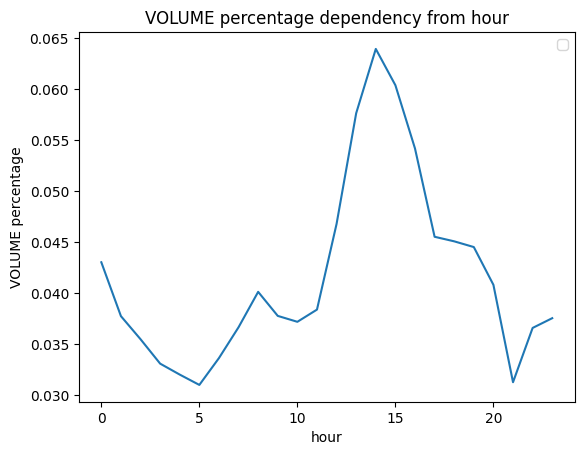

In [ ]:
#Mean Volume per hour
build_hour_plot(hour_klines, VOL)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hour           0           1           2           3           4           5   \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.042540    0.038294    0.037062    0.034703    0.033298    0.032914   
std      0.014461    0.013360    0.013648    0.012840    0.012202    0.010369   
min      0.013899    0.015475    0.013557    0.008597    0.011336    0.012395   
25%      0.033184    0.029849    0.028567    0.026943    0.026362    0.027082   
50%      0.039918    0.036385    0.034542    0.032349    0.031303    0.031061   
75%      0.048237    0.043677    0.042090    0.038637    0.037331    0.036779   
max      0.111552    0.130586    0.146748    0.114474    0.113816    0.085823   

hour           6           7           8           9   ...          14  \
count  440.000000  440.000000  440.000000  440.000000  ...  440.000000   
mean     0.035757    0.037817    0.040932    0.038959  ...    0.059009   
std      0.011774    0.011526    0.012181    0.0

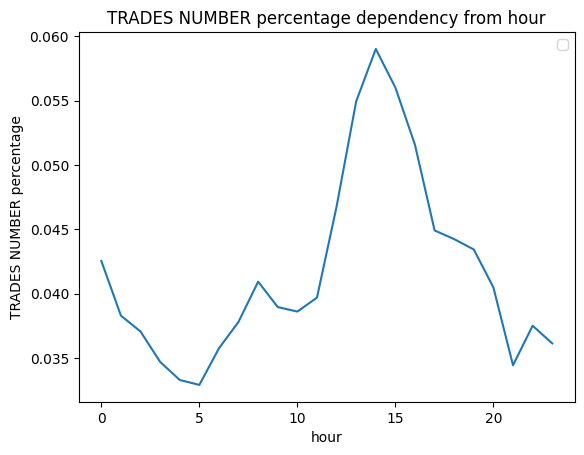

In [ ]:
#Mean Trade number per hour
build_hour_plot(hour_klines, TN)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hour            0            1            2           3            4   \
count   440.000000   440.000000   440.000000  440.000000   440.000000   
mean     13.444664     6.416126    -3.659704   -0.841140     3.163967   
std     272.067235   140.436441    79.917881   18.347157    64.964242   
min     -10.868243  -110.023810 -1673.888889 -381.333333    -9.611940   
25%      -0.124015    -0.184090    -0.090374   -0.135728    -0.092327   
50%       0.050990     0.019995     0.030983    0.013657     0.019177   
75%       0.295862     0.215415     0.193237    0.166436     0.162941   
max    5706.777779  2943.111112    61.865672   34.473118  1362.222222   

hour            5           6           7            8           9   ...  \
count   440.000000  440.000000  440.000000   440.000000  440.000000  ...   
mean     -6.043989   -0.988609    1.436932   -12.262796   -2.022345  ...   
std     132.439273   17.384988   28.500322   255.130753   44.606181  ...   
min   -2776.777778 -358.111111  -40.18

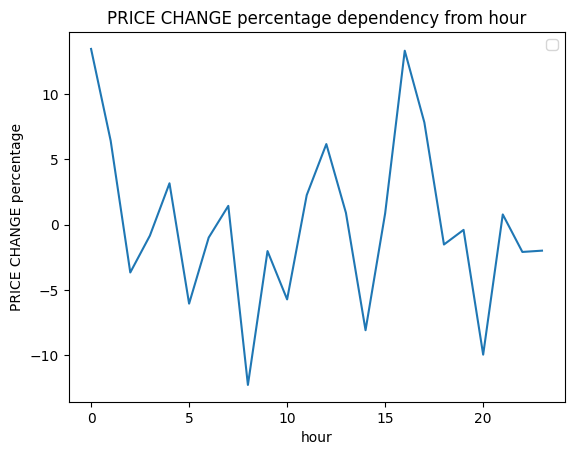

In [ ]:
#Mean Price change per hour
build_hour_plot(hour_klines, PRCH)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hour           0           1           2           3           4           5   \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     0.050184    0.046049    0.037195    0.033502    0.029863    0.030237   
std      0.046254    0.046862    0.033624    0.034013    0.030660    0.027016   
min      0.000218    0.000042    0.000058    0.000058    0.000056    0.000180   
25%      0.019394    0.016498    0.012470    0.011450    0.009669    0.011825   
50%      0.038303    0.035531    0.027085    0.024745    0.022762    0.022034   
75%      0.065385    0.058794    0.053101    0.044835    0.039101    0.041170   
max      0.332254    0.522514    0.221828    0.294456    0.247048    0.170207   

hour           6           7           8           9   ...          14  \
count  440.000000  440.000000  440.000000  440.000000  ...  440.000000   
mean     0.033688    0.033161    0.037829    0.034326  ...    0.054379   
std      0.033887    0.032092    0.035733    0.0

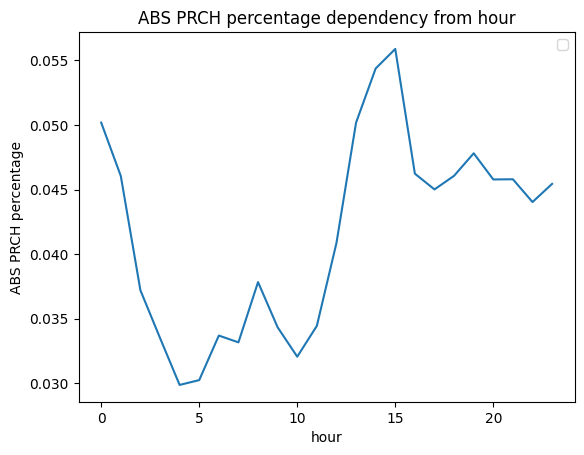

In [ ]:
#Mean Abs Price change per hour
hour_klines['ABS PRCH'] = abs(hour_klines[PRCH])
build_hour_plot(hour_klines, 'ABS PRCH')

Active hours - from 13 to 17<br>
Sleep hours - from 2 to 7

It's worth to check dependency between price trend and taker/volume. <br>
Seems like if taker/volume > 0.5 trend price is up, otherwise it goes down

In [ ]:
ruin_hypo = parsed_klines[(parsed_klines[TAKER]/parsed_klines[VOL] - 0.5) * parsed_klines[PRCH] <= 0]
ruin_hypo

,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,OPEN TIME,PRICE CHANGE,VOLUME PER TRADE NUMBER
11,50948.20,50957.69,50938.03,50947.73,8.47578,588.0,5.28884,1640322660000,-0.47,0.014415
17,50979.33,50989.99,50976.53,50981.95,4.19002,452.0,1.56362,1640323020000,2.62,0.009270
24,50969.90,50996.01,50962.49,50984.14,11.40104,628.0,5.18844,1640323440000,14.24,0.018155
29,50860.13,50866.00,50828.99,50866.00,32.28550,981.0,8.27222,1640323740000,5.87,0.032911
33,50917.76,50935.66,50901.45,50909.77,13.87576,667.0,7.28120,1640323980000,-7.99,0.020803
...,...,...,...,...,...,...,...,...,...,...
635849,19912.02,19929.59,19896.16,19905.83,377.81217,7946.0,203.11493,1678472940000,-6.19,0.047547
635855,19866.35,19879.30,19864.06,19866.47,303.22716,6993.0,140.13148,1678473300000,0.12,0.043362
635862,19930.55,19935.69,19921.31,19926.16,235.44381,6611.0,125.59698,1678473720000,-4.39,0.035614
635865,19912.09,19913.98,19896.00,19913.89,304.29234,7480.0,149.05707,1678473900000,1.80,0.040681


Unfortunately less than 25% of data has such dependency

Let's check hour data

In [ ]:
ruin_hypo_hour = hour_klines[(hour_klines[TAKER]/hour_klines[VOL] - 0.5) * hour_klines[PRCH] <= 0]
ruin_hypo_hour

,date,OPEN TIME,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,PRICE CHANGE,ABS PRCH
0,2021-12-24 05:00:00,1640322000000,50951.41,51026.34,50828.99,51012.73,765.92466,38919.0,376.32741,61.32,61.32
1,2021-12-24 06:00:00,1640325600000,51012.72,51012.73,50736.11,50883.73,955.19150,43232.0,477.87504,-128.99,128.99
10,2021-12-24 15:00:00,1640358000000,50760.99,50987.20,50384.43,50956.68,1950.43136,67160.0,856.05460,195.69,195.69
14,2021-12-24 19:00:00,1640372400000,51600.47,51810.00,51083.58,51126.40,1935.07156,65289.0,991.64701,-474.07,474.07
15,2021-12-24 20:00:00,1640376000000,51126.40,51236.15,50773.90,51109.18,1640.57091,53714.0,868.69966,-17.22,17.22
...,...,...,...,...,...,...,...,...,...,...,...
10572,2023-03-09 17:00:00,1678381200000,21479.31,21524.96,21400.00,21469.46,20661.68843,473932.0,10416.56786,-9.85,9.85
10578,2023-03-09 23:00:00,1678402800000,20343.58,20379.58,20274.62,20362.22,12856.26386,330513.0,6204.96961,18.64,18.64
10580,2023-03-10 01:00:00,1678410000000,20121.38,20159.50,19776.22,20111.01,51259.99284,839940.0,25644.45973,-10.37,10.37
10581,2023-03-10 02:00:00,1678413600000,20111.87,20141.72,20024.95,20040.44,15373.36430,355847.0,7830.31774,-71.43,71.43


In [ ]:
ruin_hypo_hour.describe()

,OPEN TIME,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,PRICE CHANGE,ABS PRCH
count,2.907000e+03,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2.907000e+03,2907.000000,2907.000000,2907.000000
mean,1.658382e+12,28342.858951,28461.574396,28236.935421,28358.621352,6148.146708,1.451797e+05,3057.276522,15.762401,73.927706
std,1.106371e+10,10399.719399,10443.878672,10356.859226,10406.014828,6217.888293,1.294409e+05,3098.387571,126.102201,103.359168
min,1.640322e+12,15687.470000,15781.340000,15588.000000,15760.420000,240.245560,1.271100e+04,119.352550,-783.530000,0.010000
25%,1.648643e+12,19697.185000,19772.385000,19589.230000,19706.510000,1532.443560,3.966950e+04,752.729565,-25.635000,15.580000
50%,1.657771e+12,23170.560000,23265.000000,23117.920000,23193.650000,4557.315830,1.152820e+05,2276.018650,9.770000,39.670000
75%,1.668262e+12,39018.460000,39176.995000,38876.945000,39018.610000,8582.917650,2.103430e+05,4258.523505,51.675000,93.070000
max,1.678435e+12,51853.100000,51932.000000,51626.550000,51690.690000,74150.592310,1.232503e+06,36940.708230,1902.660000,1902.660000


Here we can see the same result as for one minute data

In [ ]:
hour_klines['TAKER PERCENTAGE'] = hour_klines[TAKER]/hour_klines[VOL]
hour_klines

,date,OPEN TIME,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,VOLUME,TRADES NUMBER,TAKER,PRICE CHANGE,ABS PRCH,TAKER PERCENTAGE
0,2021-12-24 05:00:00,1640322000000,50951.41,51026.34,50828.99,51012.73,765.92466,38919.0,376.32741,61.32,61.32,0.491337
1,2021-12-24 06:00:00,1640325600000,51012.72,51012.73,50736.11,50883.73,955.19150,43232.0,477.87504,-128.99,128.99,0.500292
2,2021-12-24 07:00:00,1640329200000,50883.73,51076.98,50818.10,50994.75,913.84277,33824.0,477.85241,111.02,111.02,0.522904
3,2021-12-24 08:00:00,1640332800000,50994.75,51198.00,50895.57,51069.18,998.78873,38315.0,509.86182,74.43,74.43,0.510480
4,2021-12-24 09:00:00,1640336400000,51069.18,51300.01,51034.97,51267.12,909.00254,32787.0,460.28095,197.94,197.94,0.506358
...,...,...,...,...,...,...,...,...,...,...,...,...
10593,2023-03-10 14:00:00,1678456800000,20184.90,20191.40,19657.11,19819.80,47271.45090,763464.0,23348.47474,-365.10,365.10,0.493923
10594,2023-03-10 15:00:00,1678460400000,19819.80,20037.75,19766.00,20004.96,36948.61278,610109.0,18777.73823,185.16,185.16,0.508212
10595,2023-03-10 16:00:00,1678464000000,20004.96,20307.73,19928.83,20016.36,36709.18200,651876.0,18733.13791,11.40,11.40,0.510312
10596,2023-03-10 17:00:00,1678467600000,20015.11,20082.66,19830.74,19930.48,31007.14935,597819.0,15401.30976,-84.63,84.63,0.496702


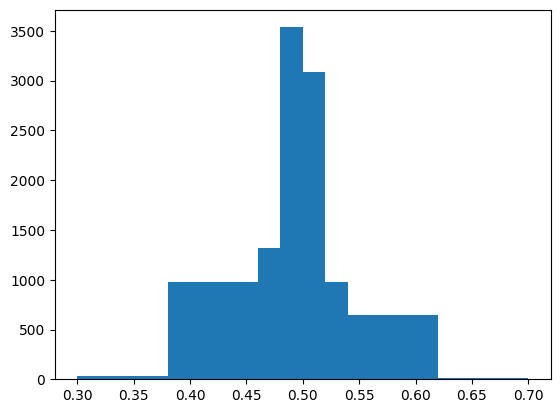

In [ ]:
plt.hist(hour_klines["TAKER PERCENTAGE"], bins=[0.3, 0.38, 0.46, 0.48, 0.5, 0.52, 0.54, 0.62, 0.7])
plt.show()

# Check some stats metrics

Look at exponential weighted mean of a **price**

**Minute data**

In [ ]:
EWM_PR = "Exp Weighted Mean Price"
parsed_klines[EWM_PR] = parsed_klines[CPR].ewm(span= 7, adjust= False).mean()

In [ ]:
import matplotlib.pyplot as plt

def compare_results(df, fields, skip_rows=0, n_rows=1000, one_plot=False):
  if not one_plot:
    plt.plot(df.loc[skip_rows:skip_rows + n_rows, fields[0]], label=fields[0])

  plt.plot(df.loc[skip_rows:skip_rows + n_rows, fields[-1]], label=fields[-1])

  #add legend to plot
  plt.legend(loc=2)
  plt.show()

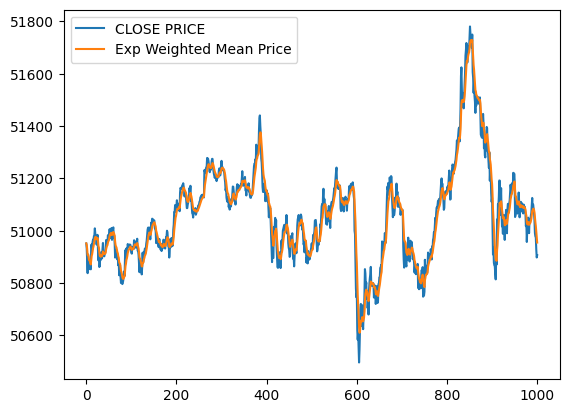

In [ ]:
compare_results(parsed_klines, [CPR, EWM_PR])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mape = mean_absolute_percentage_error(parsed_klines[CPR][6:], parsed_klines[EWM_PR][5:-1])
rmse = mean_squared_error(parsed_klines[CPR][6:], parsed_klines[EWM_PR][5:-1]) ** (1/2)
mape, rmse

(0.0007669466786778522, 38.584575736717056)

In [ ]:
best_mape = mape
best_rmse = rmse
best_span = 7

for span in range(2, 100):
  parsed_klines[EWM_PR] = parsed_klines[CPR].ewm(span=span, adjust= False).mean()
  mape = mean_absolute_percentage_error(parsed_klines[CPR][span-1:], parsed_klines[EWM_PR][span-2:-1])
  rmse = mean_squared_error(parsed_klines[CPR][span-1:], parsed_klines[EWM_PR][span-2:-1]) ** (1/2)

  if rmse < best_rmse:
    best_rmse = rmse
    best_mape = mape
    best_span = span

best_mape, best_rmse, best_span

(0.0005430358355551662, 27.161534931392293, 2)

**Day data**

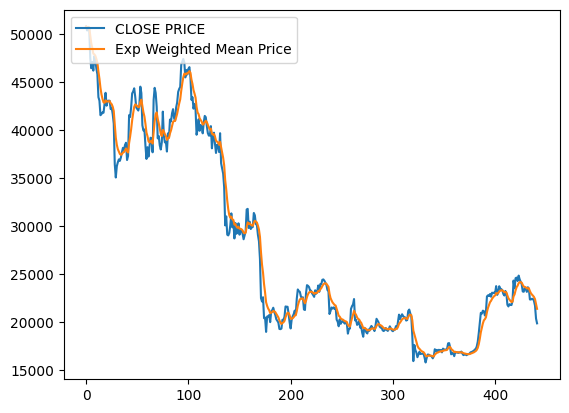

In [ ]:
EWM_PR = "Exp Weighted Mean Price"
day_parsed_klines = agg_to_freq_data(parsed_klines, 60*24)
day_parsed_klines[EWM_PR] = day_parsed_klines[CPR].ewm(span= 7, adjust= False).mean()
mape = mean_absolute_percentage_error(day_parsed_klines[CPR][span-1:], day_parsed_klines[EWM_PR][span-2:-1])
rmse = mean_squared_error(day_parsed_klines[CPR][span-1:], day_parsed_klines[EWM_PR][span-2:-1]) ** (1/2)
compare_results(day_parsed_klines, [CPR, EWM_PR])

In [ ]:
best_mape = mape
best_rmse = rmse
best_span = 7

for span in range(2, 100):
  day_parsed_klines[EWM_PR] = day_parsed_klines[CPR].ewm(span=span, adjust= False).mean()
  mape = mean_absolute_percentage_error(day_parsed_klines[CPR][span-1:], day_parsed_klines[EWM_PR][span-2:-1])
  rmse = mean_squared_error(day_parsed_klines[CPR][span-1:], day_parsed_klines[EWM_PR][span-2:-1]) ** (1/2)

  if rmse < best_rmse:
    best_rmse = rmse
    best_mape = mape
    best_span = span

best_mape, best_rmse, best_span

(0.02376608623550055, 1032.922782662061, 2)

**END**

# P.S.

In [ ]:
!pip install weightedstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import weightedstats as ws

def weighted_median_by_field(df, values_field, weights_field, window=10):
  values = df[values_field].tolist()
  weights = df[weights_field].tolist()
  wm_vals = []
  for i in range(len(values)):
    if window < i + 2:
      wm_val = ws.weighted_median(values[i-window+1:i+1], weights=weights[i-window+1:i+1])
    else:
      wm_val = ws.weighted_median(values[:i+1], weights=weights[:i+1])

    wm_vals.append(wm_val)

  return wm_vals

In [ ]:
wm_vals = weighted_median_by_field(parsed_klines, OPR, VOL, window=7)
mape = mean_absolute_percentage_error(parsed_klines[OPR], wm_vals)
mape

0.0006845690249374766

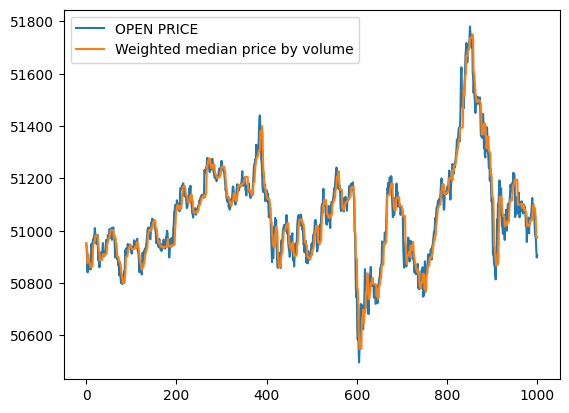

In [ ]:
WM_PR_VOL = "Weighted median price by volume"
parsed_klines[WM_PR_VOL] = pd.Series(wm_vals)
compare_results(parsed_klines, [OPR, WM_PR_VOL])

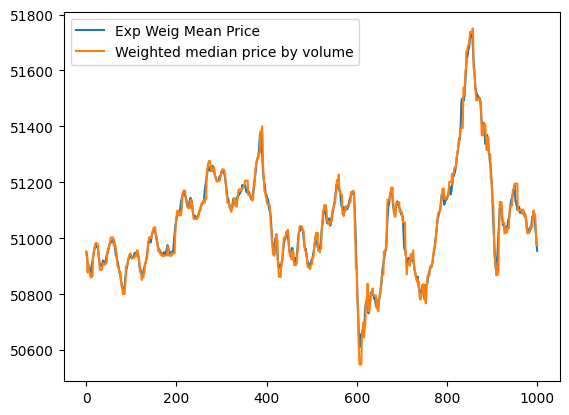

In [ ]:
compare_results(parsed_klines, [EWM_PR, WM_PR_VOL])

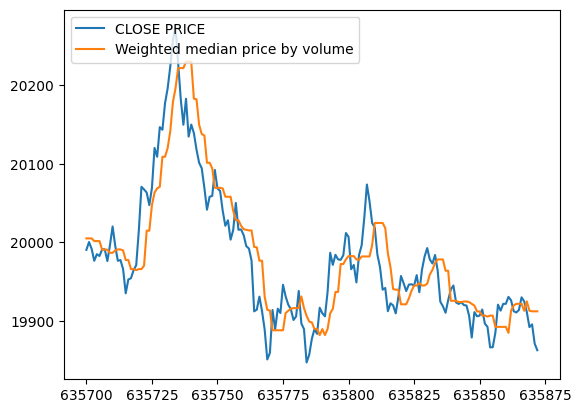

0.001288554109558361

In [ ]:
compare_results(parsed_klines, [CPR, WM_PR_VOL], skip_rows=635700)
mean_absolute_percentage_error(parsed_klines.loc[635800:, CPR], parsed_klines.loc[635800:, WM_PR_VOL])

In [ ]:
l_CPR = parsed_klines.loc[1:, CPR].tolist()
l_WM = parsed_klines.loc[:, WM_PR_VOL].tolist()
profit = [l_CPR[10] - l_WM[0]]
for i in range(1, len(l_CPR) - 10):
  profit.append(l_CPR[i + 10] - l_WM[i] + profit[i - 1])

profit

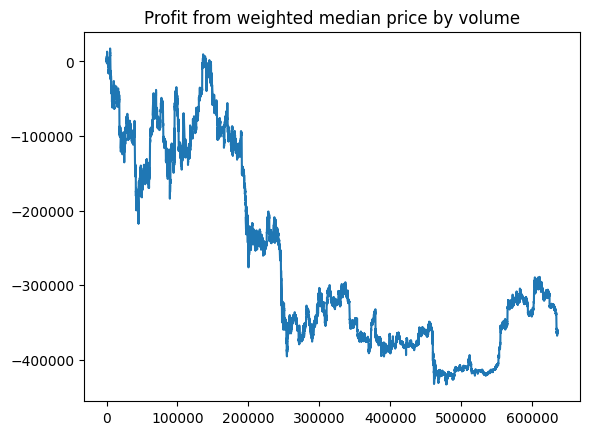

In [ ]:
import numpy as np

plt.plot(np.arange(len(profit)), profit)
plt.title("Profit from weighted median price by volume")
plt.show()

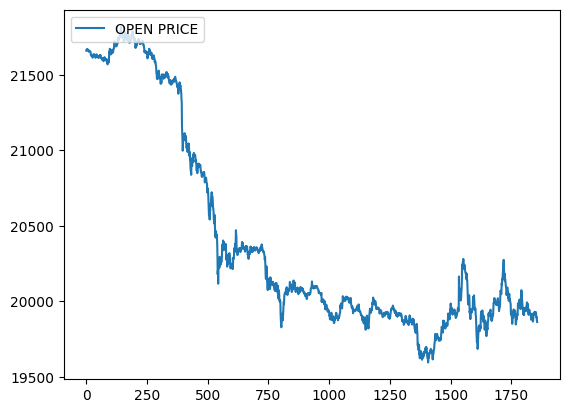

In [ ]:
plt.plot(np.arange(len(l_CPR) - 634015), l_CPR[634015:], label=OPR)

#plt.plot(np.arange(len(l_WM) - 630005), l_WM[630005:], label=WM_PR_VOL)

#add legend to plot
plt.legend(loc=2)
plt.show()

In [ ]:
mean_absolute_percentage_error(l_CPR[635000:-4], l_WM[635005:])

0.0005184009222556707

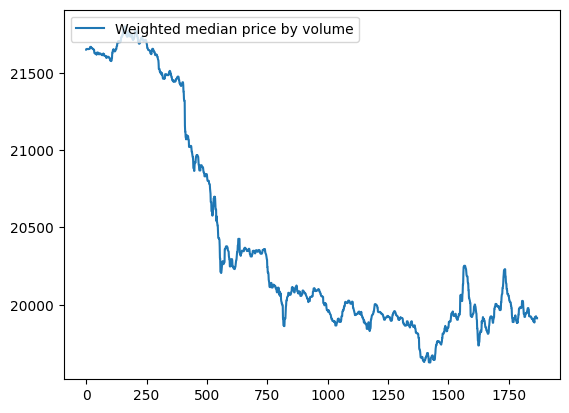

In [ ]:
#plt.plot(l_CPR[632200:634015], label=OPR)

plt.plot(l_WM[634005:], label=WM_PR_VOL)

#add legend to plot
plt.legend(loc=2)
plt.show()

Есть ли такая функция f((v1, prch_1) ... (vn, prch_n)) = k, что сможет описать одно движение тренда???